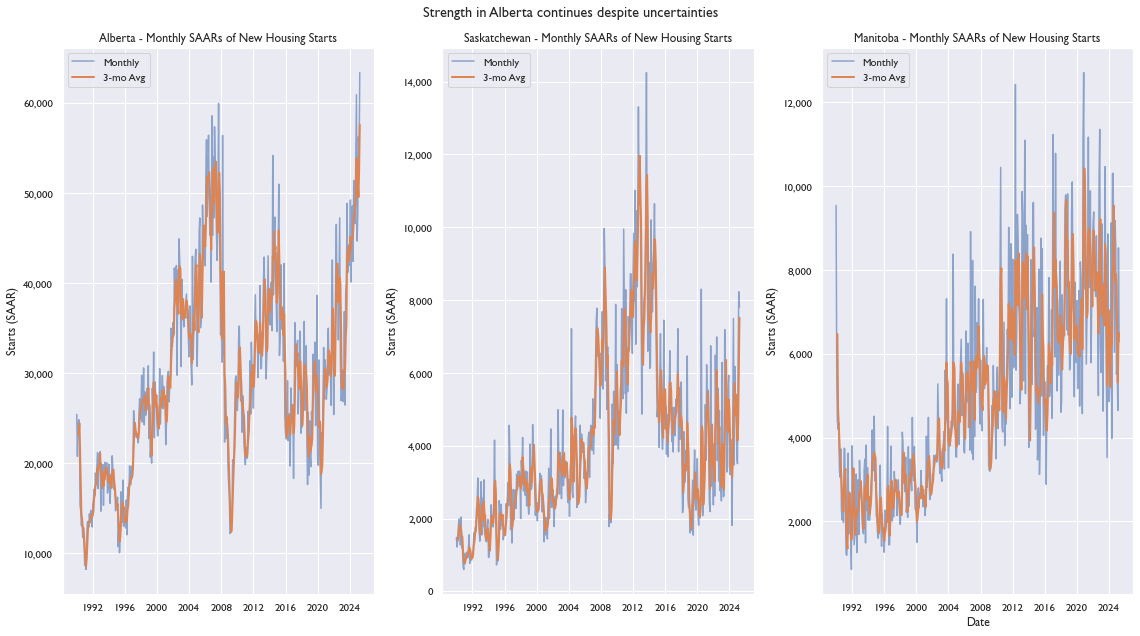

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from stats_can import StatsCan
import matplotlib.ticker as ticker

sns.set(font='Gill Sans MT')

# Load StatCan data

sc = StatsCan()
#sc.update_tables()
df = sc.table_to_df("34-10-0158-01")

# Filter for new housing starts, SAAR, all dwelling types, Prairie provinces
prairies = ['Alberta', 'Saskatchewan', 'Manitoba']

# Convert REF_DATE to datetime
df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])

# Keep only relevant columns
df = df[["REF_DATE", "GEO", "VALUE"]]

# Pivot for plotting
pivot_df = df.pivot(index="REF_DATE", columns="GEO", values="VALUE")
pivot_df = pivot_df*1000
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 9), sharex=True)


for i, province in enumerate(prairies):
    ax = axes[i]
    ax.plot(pivot_df.index, pivot_df[province], label="Monthly", alpha=0.6)
    ax.plot(pivot_df.index, pivot_df[province].rolling(3).mean(), label="3-mo Avg", linewidth=2)
    ax.set_title(f"{province} - Monthly SAARs of New Housing Starts")
    ax.set_ylabel("Starts (SAAR)")
    ax.legend(loc="upper left")
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.legend()
axes[-1].set_xlabel("Date")

plt.suptitle('Strength in Alberta continues despite uncertainties')
plt.tight_layout()
plt.show()